
> _In the proposed adversarial nets framework, the generative model is pitted against an adversary: a discriminative model that learns to determine whether a sample is from the model distribution or the data distribution. The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistinguishable from the genuine articles._ [Goodfellow et al. 2014](http://arxiv.org/abs/1406.2661)


## Features

Two parts:

* Autoencoder to reconstruct its input.
* Classifier to predict category (true or false).

It seems to me that features useful for classification would also be useful for reconstruction? For example ...? And vice versa?

## Optimising, issues and other tricks

* log or ln? (what base?)
* gradient clipping?
* 


## Efficiency

#### Better gradient estimates
It bugs me that we evaluate the graph many times, but dont use the information to update the generator. Maybe we would average the gradients to make more accurate estimates? (but that somewhat defeats te point on SGD?!?)

```python
for i in range(50):
    g_grad,d_grad = get_gradients()
    tf.apply_gradients(d_vars,d_grad)
    
    total_g_grad += g_grad

tf.apply_gradients(g_vars,total_g_grad/50)

```

#### Dynamic learning rates

Other solutions? Better control of learning rates.
See [this](...)

-- _Naive version_
```python
a_g = tf.Variable(0.001,'gen_learning_rate')
a_d = tf.Variable(0.001,'dis_learning_rate')
sys_loss = d_loss - g_loss
tf.train.AdamOptimizer(0.001).minimize(loss=sys_loss,var_list=[a_g,a_d])
```

hmm, but this means it needs to backprop through its own optimisation fuctions?? can it do that? ill find out... hmm, this turns it into some sort of rnn? as we have an influence from the last time step?
hmm. the above algorithm wont work as i need to sum tings ourside of the sess and feed them back in. sess doesnt keep a state for a ff net..

no this can be done, it just has to be done inside the session, with a for loop. like a rnn.

## Loss functions



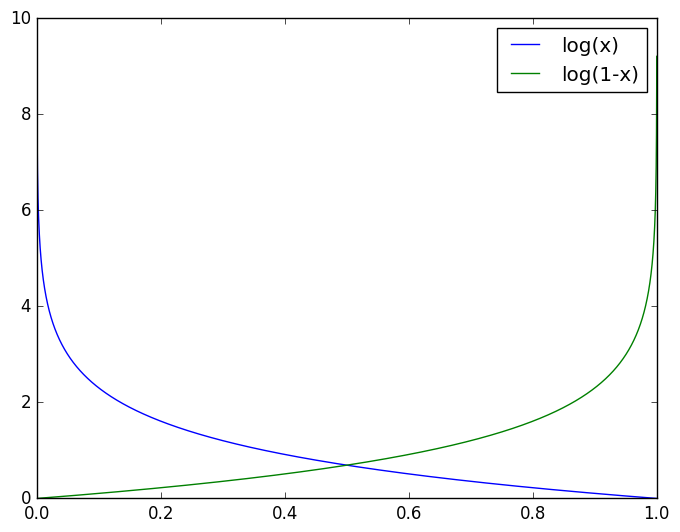

PyObject <matplotlib.legend.Legend object at 0x32091f748>

In [25]:
using PyPlot
x = linspace(0,1,10000) 
plot(x, -log(x),label="log(x)")
plot(x, -log(1-x),label="log(1-x)")
legend()

__Q__ hmm. how big a problem is this numerically? as autograd actually evaluates 1/d and then multiplies by d(1-d). (aka they will cancel. by the computer will have to represent some LARGE numbers??

Oh. Never mind. The numbers would have to be absolutely tiny for log to make large numbers. It's fine.
No, actually we are talking about the gradient, which does get large. 



### Algorithmic game theory

##### Nash or correlated equilibrium?



##### Zero sum games

What if we made the system zero sum? So the loss functions would be ...? 
Wait or is it already zero sum? Does the sucess of one net cost the other?
